# Purpose of the notebook 

In this notebook CNVs are inferred on a Xenium dataset (Ovarian cancer) by first performing expression-based smoothing 

##### Import packages ####

In [3]:
import os
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import infercnvpy as cnv
import matplotlib

import sys
sys.path.append("../..")
import insitucnv as icv

### Read adata

In [4]:
saving_path='/media/sergio/Ymir/5kovarian_for_cnv/figures'
adata=sc.read('/media/sergio/Ymir/5kovarian_for_cnv/adata_annotated.h5ad')

### Normalize and log-transform counts

In [6]:
adata.X=adata.layers['raw']
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)

## Perform data smoothing, using expression-based neighbors

In [7]:
icv.tl.smooth_data_for_cnv(adata,n_neighbors=200)

In [ ]:
adata.write('/media/sergio/Ymir/5kovarian_for_cnv/adata_annotated_moments_neighbors_200.h5ad')

# Code with infercnv (change kernel to infercnv)

In [ ]:
adata=sc.read('/media/sergio/Ymir/5kovarian_for_cnv/adata_annotated_moments_neighbors_200.h5ad')

In [ ]:
adata.X=adata.layers['M'].copy()

In [ ]:
cnv.tl.infercnv(adata,reference_key="cell class",
reference_cat=['Monocytes','B cells','T cells','Endothelial','Low expression','Fibroblasts'],window_size=60,layer='M')

In [ ]:
cnv.pl.chromosome_heatmap(adata, groupby="cell class",dendrogram=True)

In [ ]:
cnv.tl.pca(adata)
cnv.pp.neighbors(adata)

In [ ]:
cnv.tl.leiden(adata,resolution=0.4)
sc.tl.dendrogram(adata,groupby='cnv_leiden')
sc.pl.dendrogram(adata,groupby='cnv_leiden')

In [ ]:
saving_path='/media/sergio/Ymir/5kovarian_for_cnv/figures'

In [ ]:
import matplotlib
sc.set_figure_params(scanpy=True, dpi=200, dpi_save=200, frameon=False, vector_friendly=True, fontsize=13, figsize=(5,5), color_map=None, format='pdf', facecolor=None, transparent=False, ipython_format='png2x')
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
cnv.pl.chromosome_heatmap(adata, groupby="cnv_leiden",dendrogram=True,show=False)
plt.savefig(saving_path+'/heatmap_cnv_leiden_moments.pdf')

In [ ]:
import matplotlib
sc.set_figure_params(scanpy=True, dpi=200, dpi_save=200, frameon=False, vector_friendly=True, fontsize=13, figsize=(5,5), color_map=None, format='pdf', facecolor=None, transparent=False, ipython_format='png2x')
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
cnv.pl.chromosome_heatmap_summary(adata, groupby="cnv_leiden",dendrogram=True,vmax=0.4,show=False)
plt.savefig(saving_path+'/heatmap_summary_cnv_leiden_moments.pdf')

/home/sergio/.local/lib/python3.10/site-packages/scanpy/_settings.py:488: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  IPython.display.set_matplotlib_formats(*ipython_format)


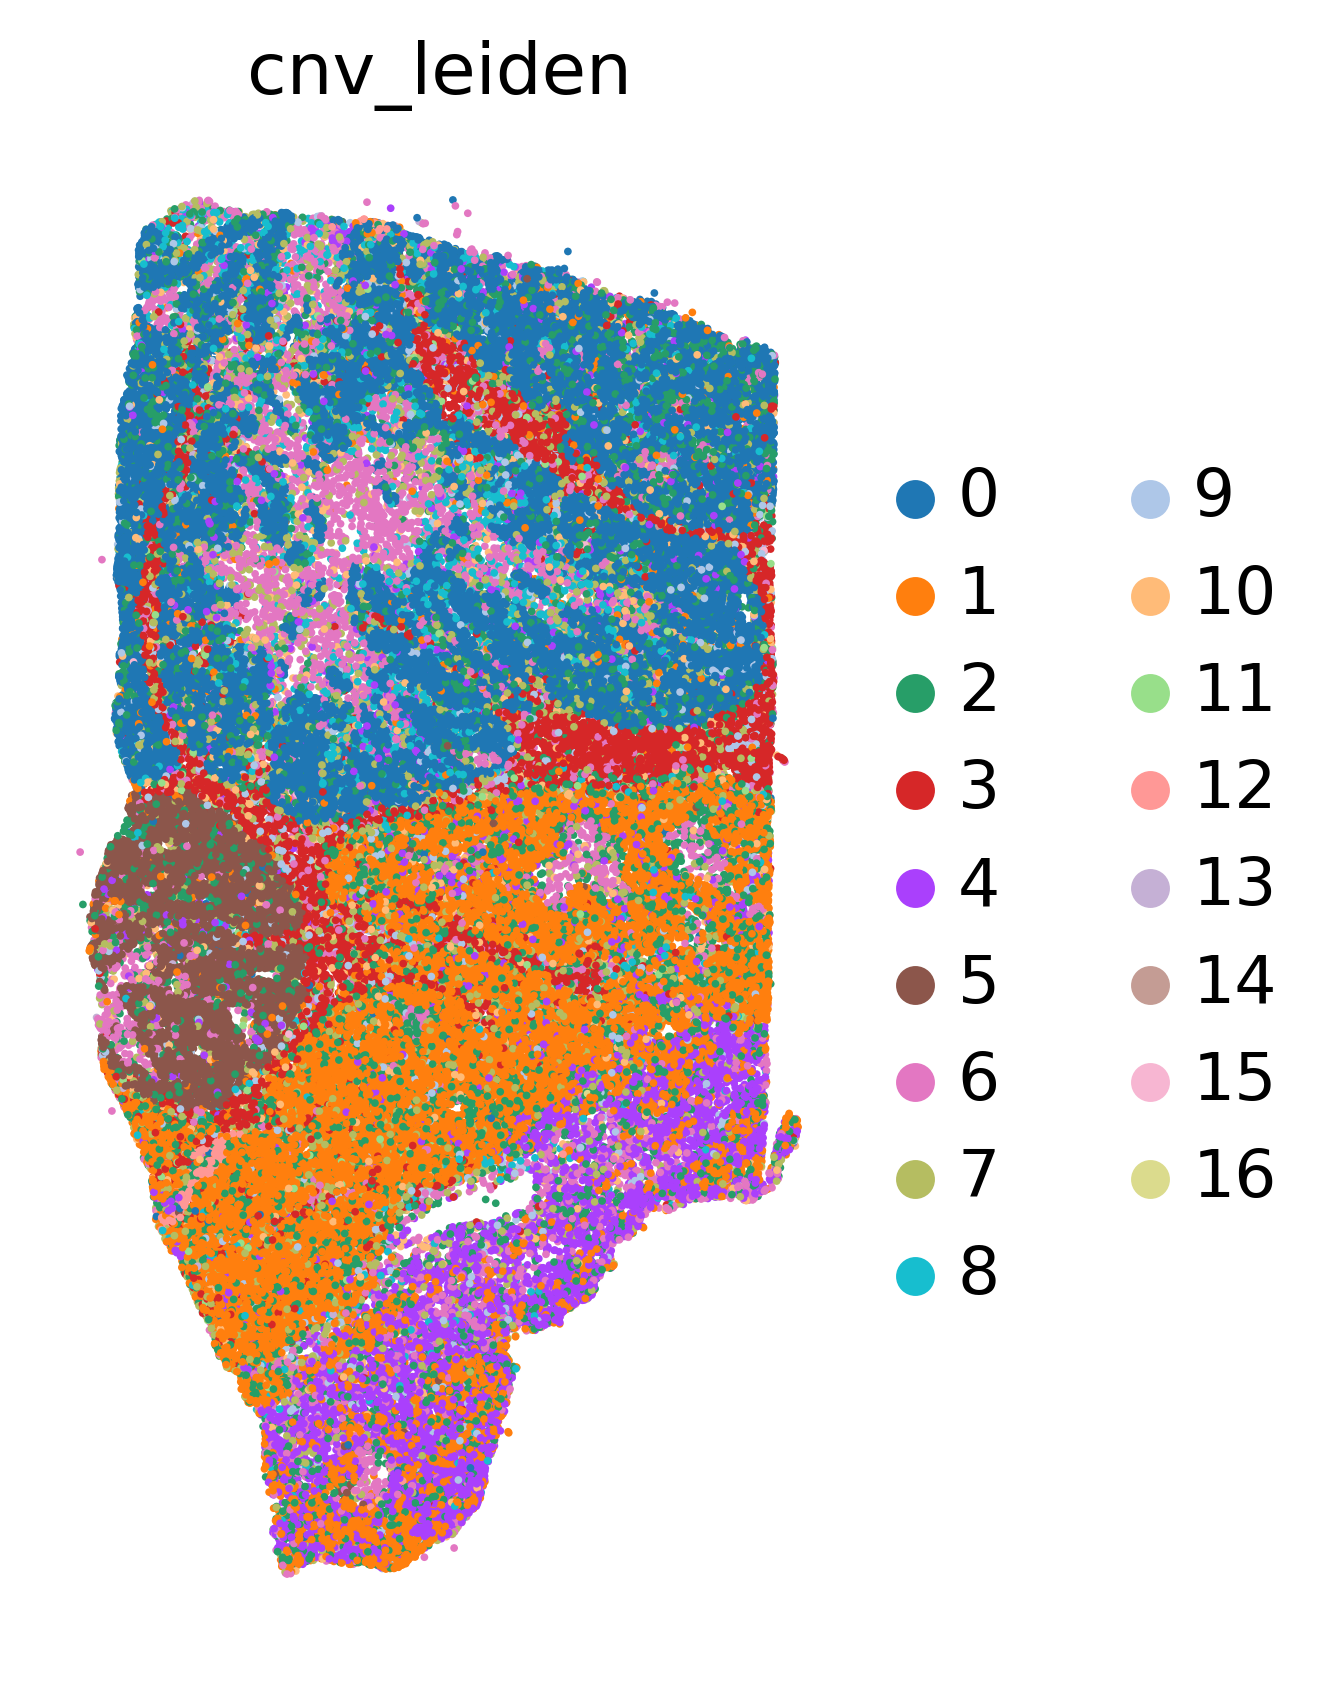

In [142]:
import matplotlib
sc.set_figure_params(scanpy=True, dpi=200, dpi_save=200, frameon=False, vector_friendly=True, fontsize=13, figsize=(5,5), color_map=None, format='pdf', facecolor=None, transparent=False, ipython_format='png2x')
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
sc.pl.spatial(adata,color='cnv_leiden',spot_size=120,frameon=False)
plt.savefig(saving_path+'/spatial_cnv_leiden_moments.pdf')

In [ ]:
saving_path='/media/sergio/Ymir/5kovarian_for_cnv/figures'
adata.write('/media/sergio/Ymir/5kovarian_for_cnv/adata_moments_neighbors_200_cnvinfered.h5ad')

### Save basic output for exploration in viewers

In [23]:
adata.obs['x']=[a[0] for a in adata.obsm['spatial']]
adata.obs['y']=[a[1] for a in adata.obsm['spatial']]
adata.obs.loc[:,['x','y','cnv_leiden','cell class','leiden']].to_csv('/media/sergio/Ymir/5kovarian_for_cnv/adata_obs.csv')

# Cell type vs CNV inference

<Axes: xlabel='cnv_leiden'>

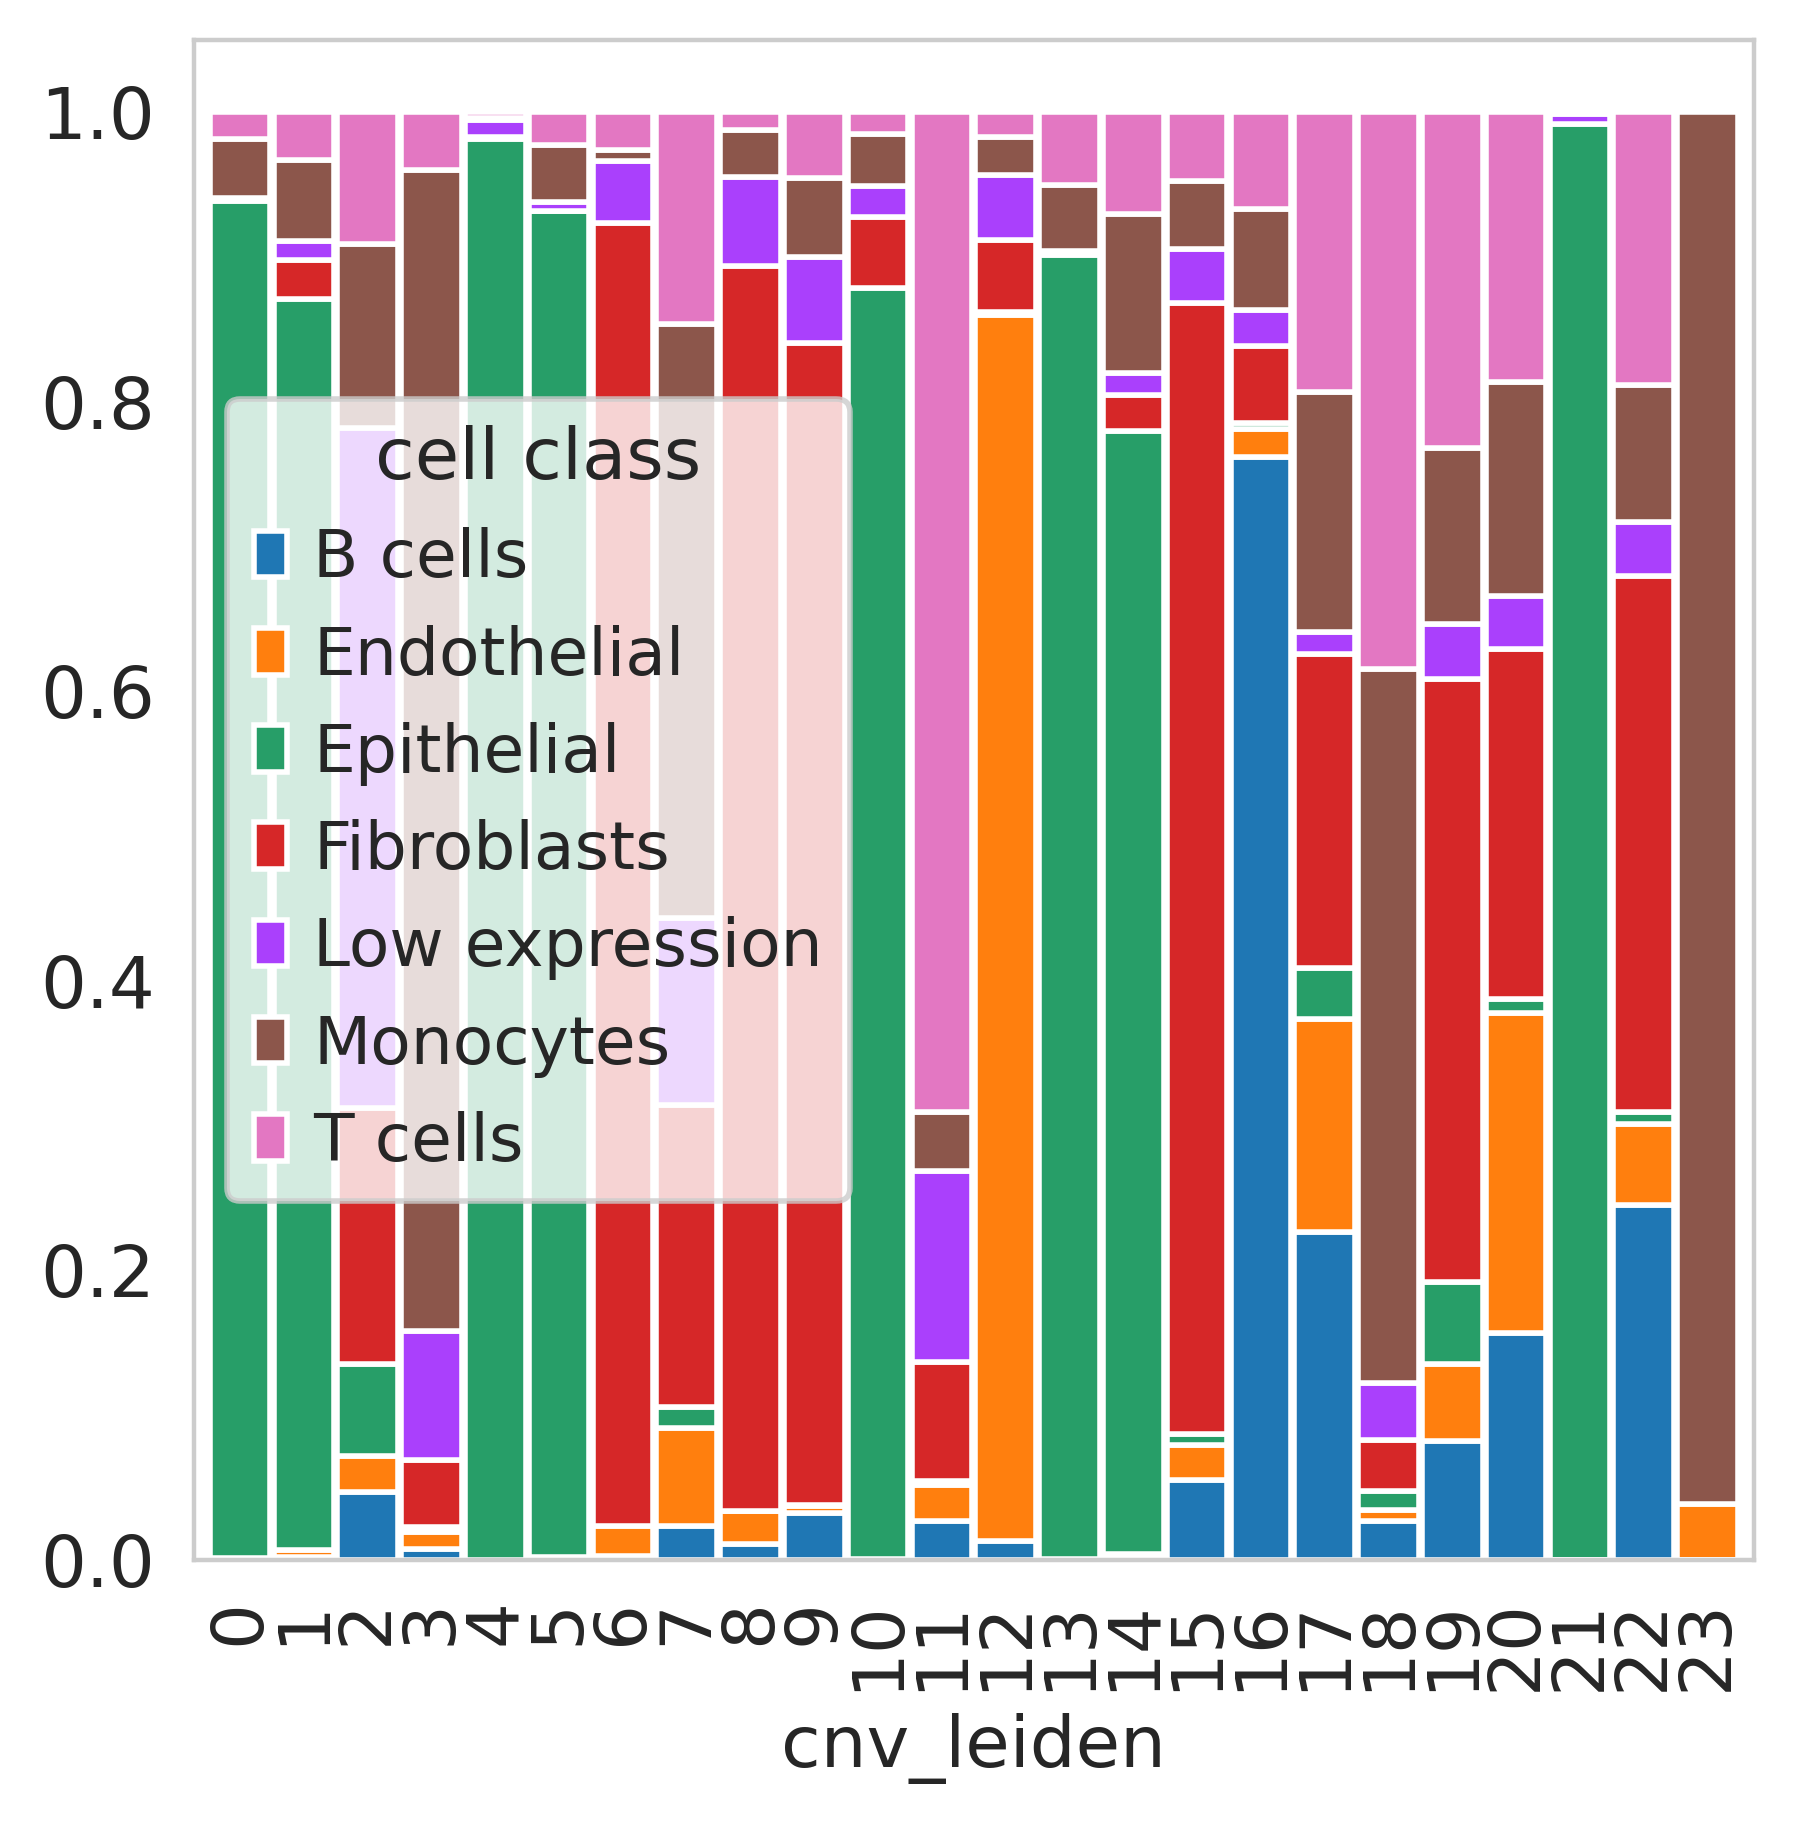

In [40]:
sns.set_style("whitegrid", {'axes.grid' : False})
exrn=pd.crosstab(adata.obs['cnv_leiden'],adata.obs['cell class'])
exrn=exrn.div(exrn.sum(axis=1),axis=0)
exrn.plot(kind='bar',stacked=True,width=0.95)

In [78]:
cnv.tl.cnv_score(adata,use_rep='cnv_pca')

In [82]:
adata.obs['computed_cnv_score']=np.sum(np.abs(adata.obsm['X_cnv_pca']),axis=1)

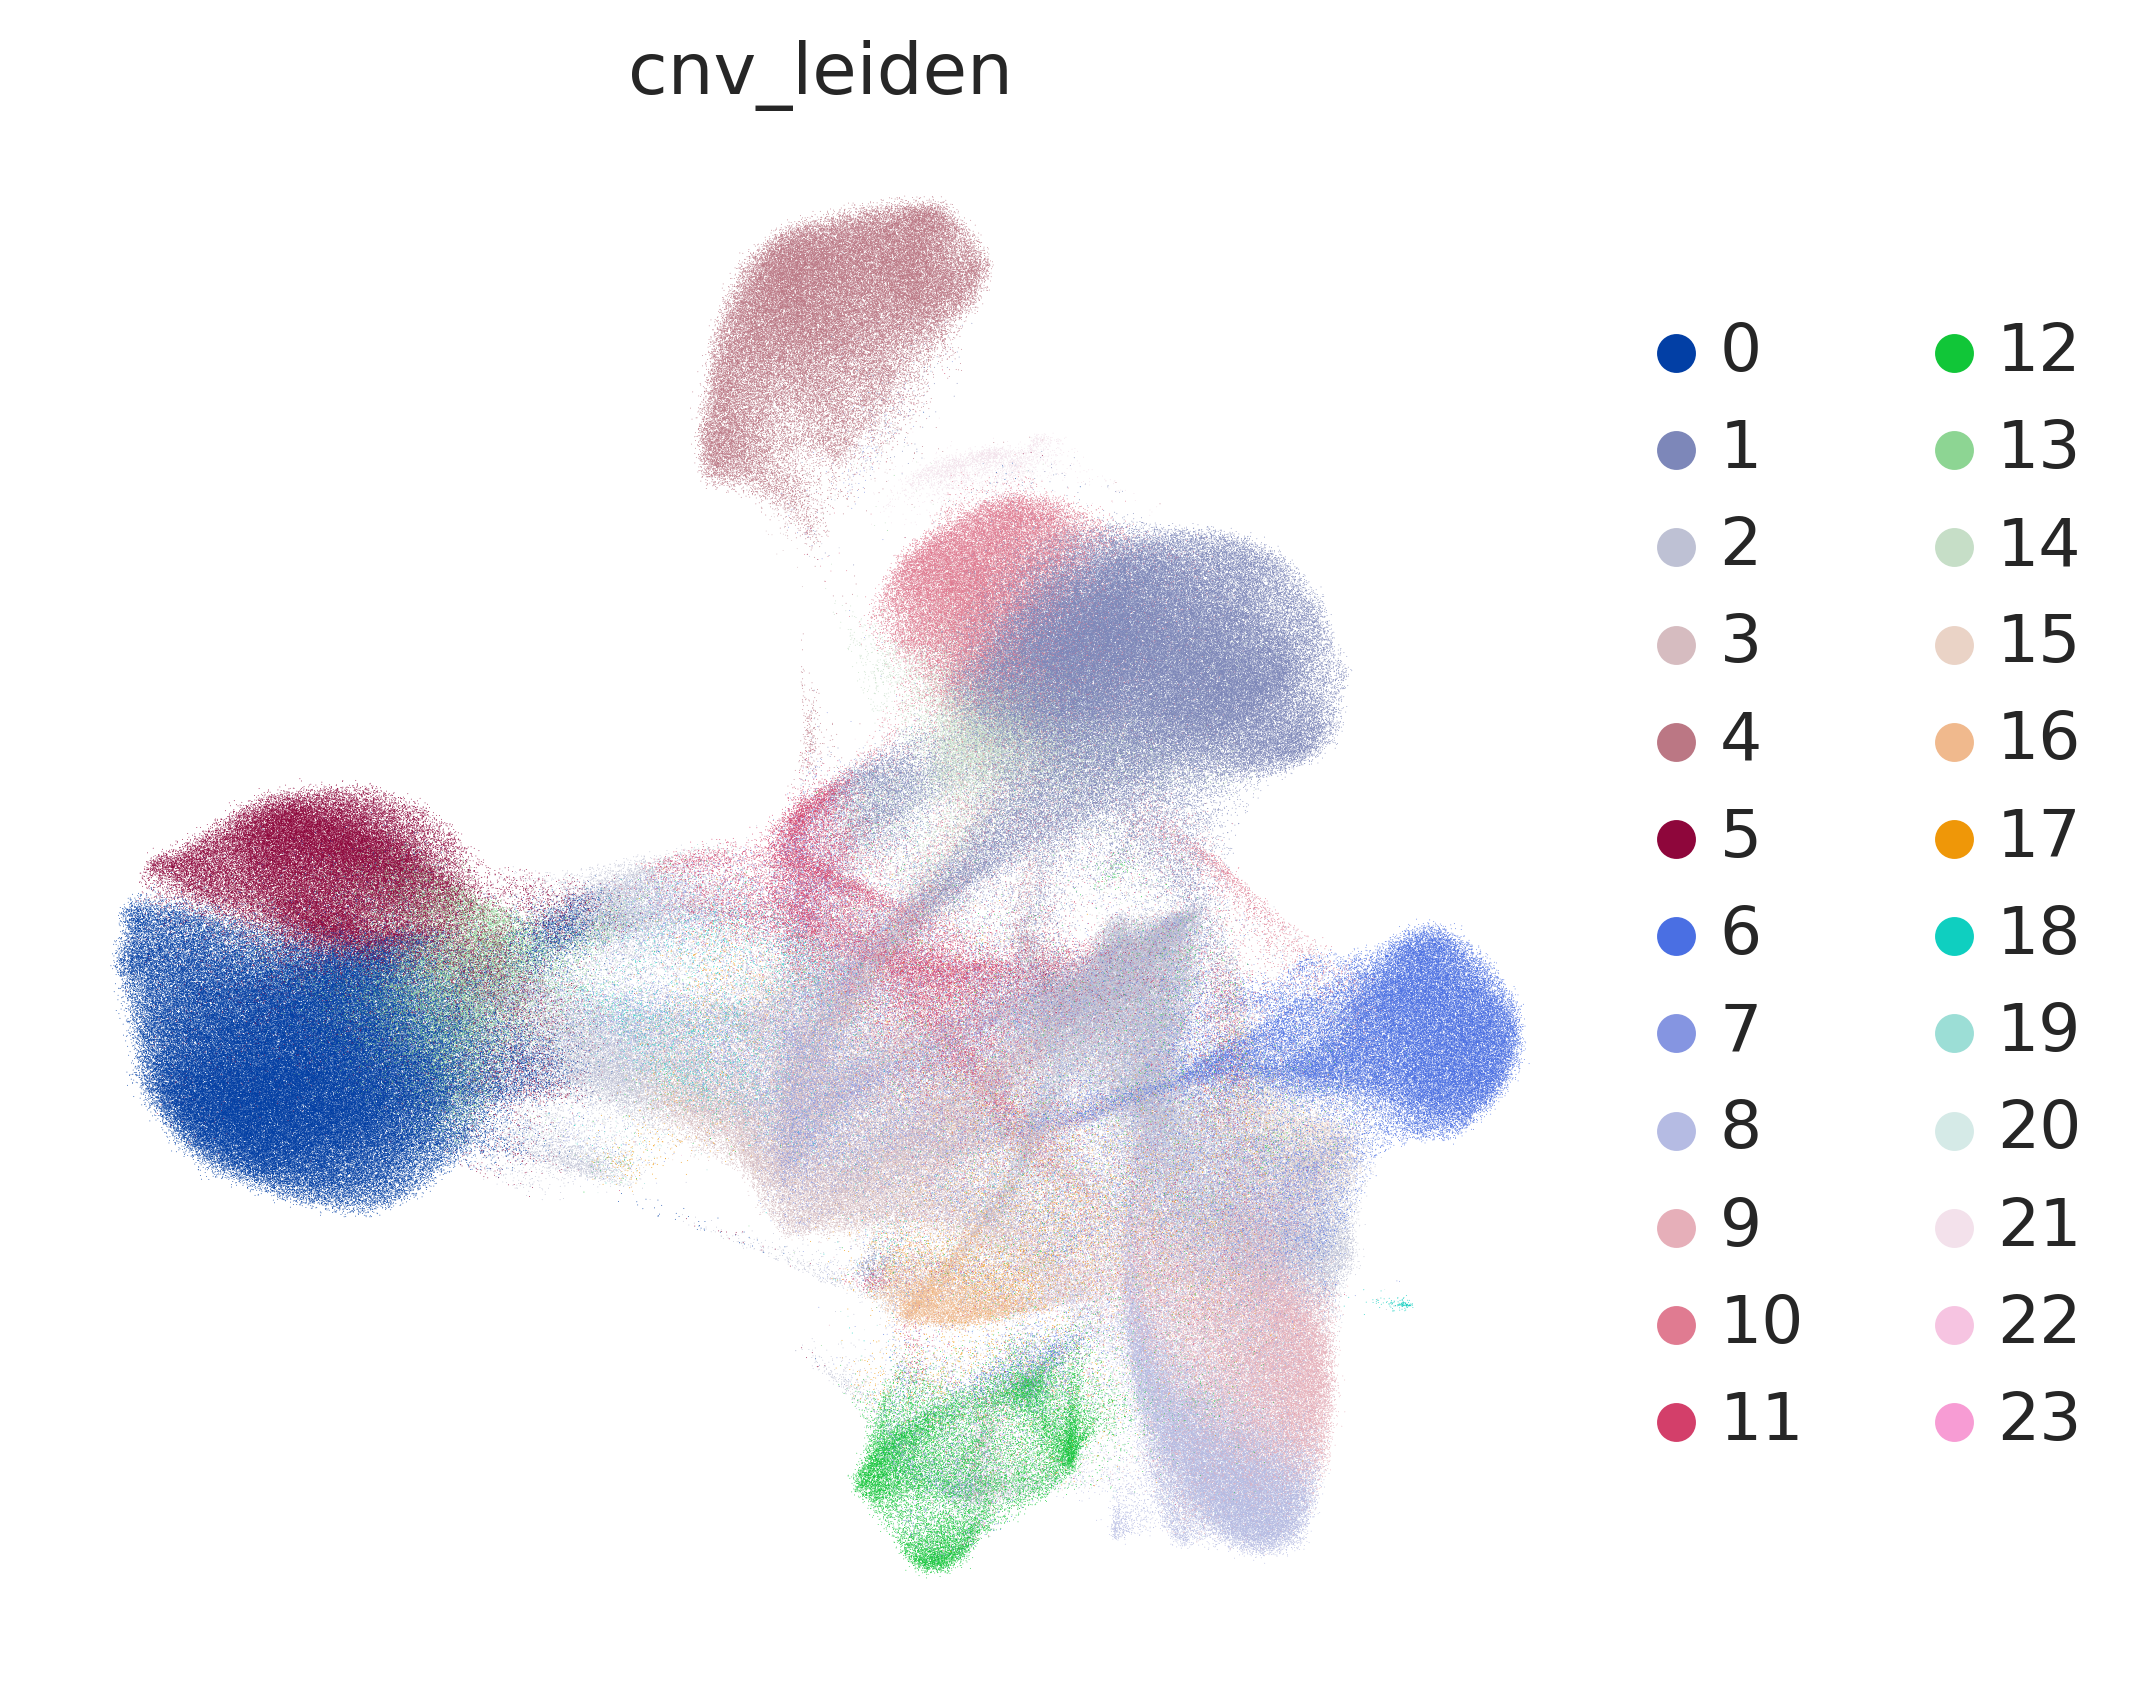

In [87]:
sc.pl.umap(adata,color='cnv_leiden',cmap='coolwarm',vmax=5)

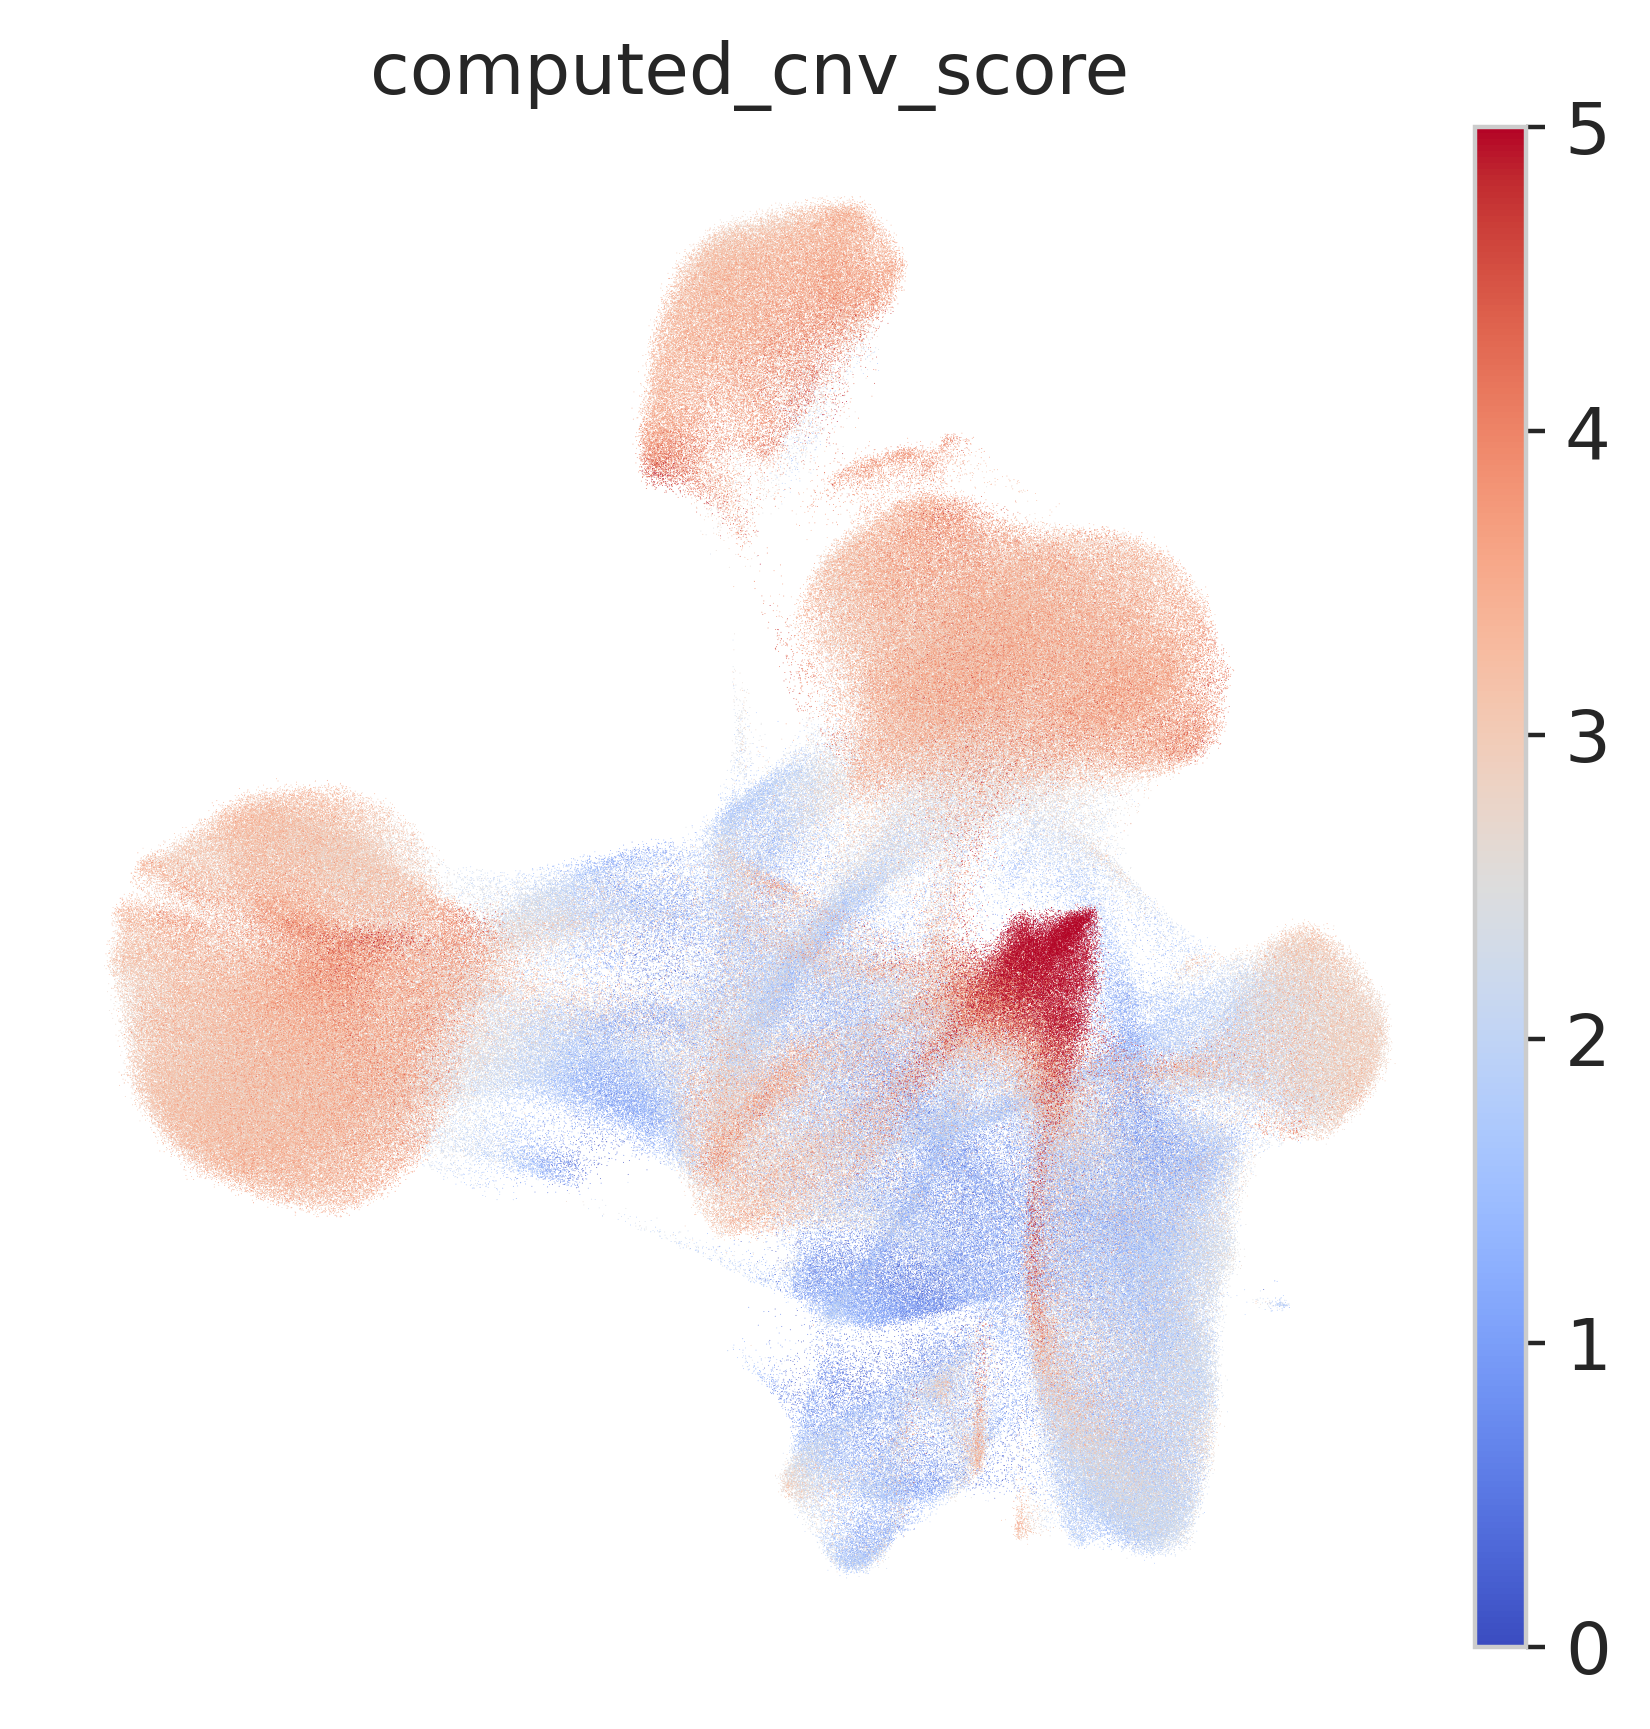

In [84]:
sc.pl.umap(adata,color='computed_cnv_score',cmap='coolwarm',vmax=5)

In [ ]:
sc.pl.dotplot(adata,['cnv_score'],groupby='cell class')

In [ ]:
leiden_vs_cnv=pd.crosstab(adata.obs['leiden'],adata.obs['cnv_leiden'])
sns.clustermap(leiden_vs_cnv,standard_scale='obs')

In [41]:
# Copykat

# VERY RELEVANT 
TAP1, TAP2 and CFB are all present in the same locus. (6p21.3) -Interferon

While the same occurs for IFIT1 and IFIT3 (10q23.31) - MHC

GATA4 and SFRP1 are located in 8p and could also generate the CNV we observe in cnv cluster 8

In [ ]:
sc.tl.rank_genes_groups(adata,groupby='cnv_leiden')

In [ ]:
sc.pl.rank_genes_groups(adata,groupby='cnv_leiden')